In [98]:
%matplotlib inline
import torch
from d2l import torch as d2l



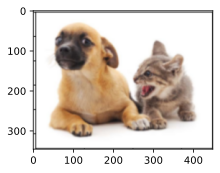

In [99]:
d2l.set_figsize()
img=d2l.plt.imread('./dogcat.png')
d2l.plt.imshow(img);

In [100]:
#在目标检测中,我们通常使用边界框来描述对象的空间位置
#边界框通常由两个点组成,一个表示左上角,一个表示右下角
#另一种的表示方式是由左上角和宽高组成

#定义在这两种表示方式之间进行转换的函数:box_corner_to_center从两角表示法转换为中心宽度高度表示法
#输入参数boxes可以是长度为4的张量,也可以是形状为(n,4)的二维张量,n是边界框的数量

def box_corner_to_center(boxes):
    """从（左上，右下）转换到（中间，宽度，高度）"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis=-1)
    return boxes

def box_center_to_corner(boxes):
    """从（中间，宽度，高度）转换到（左上，右下）"""
    cx,cy,w,h=boxes[:,0],boxes[:,1],boxes[:,2],boxes[:,3]
    x1=cx-0.5*w
    y1=cy-0.5*h
    x2=cx+0.5*w
    y2=cy+0.5*h
    boxes=torch.stack((x1,y1,x2,y2),axis=-1)
    return boxes



In [101]:
dog_bbox,cat_bbox=[35.0,35.0,250.0,320.0],[260.0,80.0,400.0,310.0]


In [102]:
boxes=torch.tensor((dog_bbox,cat_bbox))
box_center_to_corner(box_corner_to_center(boxes))==boxes


tensor([[True, True, True, True],
        [True, True, True, True]])

In [103]:
def bbox_to_rect(bbox,color):
    #将边界框格式转换为matplotlib格式
    return d2l.plt.Rectangle(xy=(bbox[0],bbox[1]),width=bbox[2]-bbox[0],height=bbox[3]-bbox[1],fill=False,edgecolor=color,linewidth=2)
    

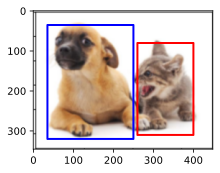

In [104]:
fig=d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox,'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox,'red'))